In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_classification

from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.metrics import classification_report_imbalanced

In [4]:
file_path = Path('Resources/data.csv')
data = pd.read_csv(file_path)
data.head()

,date,totalArticles,daily_return,volume_change,spread,joy,fear,sadness,tentative,analytical,confident,anger,crossover_signal,vol_trend_signal,bollinger_signal,close,positive_return
0,2020-10-31,5.0,0.007717,0.165422,0.041145,0.0,0.0,0.000000,0.668336,0.000000,0.0,0.0,1.0,-1.0,-1.0,13567.0,1.0
1,2020-11-01,1.0,0.017845,-0.183336,0.048242,0.0,0.0,0.576203,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13809.1,0.0
2,2020-11-02,1.0,-0.003375,-0.564168,0.019277,0.0,0.0,0.000000,0.672523,0.000000,0.0,0.0,1.0,1.0,-1.0,13762.5,0.0
3,2020-11-03,2.0,-0.014292,1.237562,0.045173,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13565.8,1.0
4,2020-11-04,1.0,0.033614,-0.021746,0.055851,0.0,0.0,0.000000,0.000000,0.822162,0.0,0.0,1.0,-1.0,-1.0,14021.8,1.0


In [5]:
data.columns

Index(['date', 'totalArticles', 'daily_return', 'volume_change', 'spread',
       'joy', 'fear', 'sadness', 'tentative', 'analytical', 'confident',
       'anger', 'crossover_signal', 'vol_trend_signal', 'bollinger_signal',
       'close', 'positive_return'],
      dtype='object')

In [6]:
for i in ['totalArticles']:
    print(data[i].value_counts())

1.0     17
3.0      8
12.0     5
5.0      4
14.0     4
29.0     4
2.0      4
10.0     3
6.0      3
4.0      3
16.0     3
20.0     2
9.0      2
35.0     2
8.0      2
42.0     2
7.0      2
15.0     1
21.0     1
46.0     1
25.0     1
52.0     1
30.0     1
72.0     1
59.0     1
18.0     1
13.0     1
27.0     1
23.0     1
22.0     1
57.0     1
24.0     1
51.0     1
53.0     1
61.0     1
38.0     1
Name: totalArticles, dtype: int64


In [7]:
for i in ['fear']:
    print(data[i].value_counts())

0.000000    85
0.592034     1
0.542028     1
0.600483     1
0.561904     1
Name: fear, dtype: int64


In [8]:
data = data.set_index("date")
data.head()

,totalArticles,daily_return,volume_change,spread,joy,fear,sadness,tentative,analytical,confident,anger,crossover_signal,vol_trend_signal,bollinger_signal,close,positive_return
date,,,,,,,,,,,,,,,,
2020-10-31,5.0,0.007717,0.165422,0.041145,0.0,0.0,0.000000,0.668336,0.000000,0.0,0.0,1.0,-1.0,-1.0,13567.0,1.0
2020-11-01,1.0,0.017845,-0.183336,0.048242,0.0,0.0,0.576203,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13809.1,0.0
2020-11-02,1.0,-0.003375,-0.564168,0.019277,0.0,0.0,0.000000,0.672523,0.000000,0.0,0.0,1.0,1.0,-1.0,13762.5,0.0
2020-11-03,2.0,-0.014292,1.237562,0.045173,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,-1.0,13565.8,1.0
2020-11-04,1.0,0.033614,-0.021746,0.055851,0.0,0.0,0.000000,0.000000,0.822162,0.0,0.0,1.0,-1.0,-1.0,14021.8,1.0


In [9]:
X = data.drop(columns= "positive_return")

# target
y = data["positive_return"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                random_state=1, 
                                                   stratify=y) 
                                                   

In [11]:
scaler = StandardScaler()

In [12]:
X_scaler = scaler.fit(X_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
brf = BalancedRandomForestClassifier(n_estimators=100,random_state=1)
brf_model = brf.fit(X_train_scaled,y_train)

In [15]:
predictions_brf = brf_model.predict(X_test_scaled)
acc_score_brf = accuracy_score(y_test, predictions_brf)
print(f"Accuracy Score : {acc_score_brf *100}%")

Accuracy Score : 60.86956521739131%


In [16]:
cm_brf = confusion_matrix(y_test, predictions_brf)
cm_df_brf = pd.DataFrame(
    cm_brf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Confusion Matrix -->")
display(cm_df_brf)

Confusion Matrix -->


,Predicted 0,Predicted 1
Actual 0,4,5
Actual 1,4,10


In [17]:
print("Classification Report -->")
print(classification_report(y_test, predictions_brf))

Classification Report -->
              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47         9
         1.0       0.67      0.71      0.69        14

    accuracy                           0.61        23
   macro avg       0.58      0.58      0.58        23
weighted avg       0.60      0.61      0.60        23



In [18]:
importances = brf_model.feature_importances_
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.14854834805611974, 'volume_change'),
 (0.1398797669383557, 'daily_return'),
 (0.1386346838803821, 'totalArticles'),
 (0.13827528578993875, 'spread'),
 (0.12024555909406914, 'close'),
 (0.08264820222051127, 'tentative'),
 (0.07739767439769599, 'joy'),
 (0.06010070361345401, 'sadness'),
 (0.043338356905703306, 'analytical'),
 (0.02499361161231822, 'bollinger_signal'),
 (0.018192923716115257, 'vol_trend_signal'),
 (0.007744883775336504, 'fear'),
 (0.0, 'crossover_signal'),
 (0.0, 'confident'),
 (0.0, 'anger')]


Bad key savefig.frameon in file /Users/bencifuentes/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/bencifuentes/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/bencifuentes/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout

<AxesSubplot:>

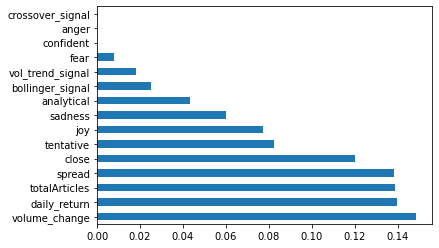

In [19]:
feat_importances = pd.Series(brf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [20]:
data2 = data.drop(columns=
                  ["tentative", 
                  "joy", 
                  "sadness", 
                  "analytical", 
                  "bollinger_signal", 
                  "vol_trend_signal", 
                  "fear", 
                  "crossover_signal", 
                  "confident", 
                  "anger", 
                  "close"], axis = 1)

data2.head()

,totalArticles,daily_return,volume_change,spread,positive_return
date,,,,,
2020-10-31,5.0,0.007717,0.165422,0.041145,1.0
2020-11-01,1.0,0.017845,-0.183336,0.048242,0.0
2020-11-02,1.0,-0.003375,-0.564168,0.019277,0.0
2020-11-03,2.0,-0.014292,1.237562,0.045173,1.0
2020-11-04,1.0,0.033614,-0.021746,0.055851,1.0


In [21]:
X_2 = data2.drop(columns= "positive_return")

# target
y_2 = data2["positive_return"]

In [22]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, 
                                                   y_2, 
                                                random_state=1, 
                                                   stratify=y) 
                                                   

In [23]:
scaler_2 = StandardScaler()

In [24]:
X_scaler_2 = scaler_2.fit(X_train_2)

In [25]:
X_train_scaled_2 = X_scaler.transform(X_train)
X_test_scaled_2 = X_scaler.transform(X_test)

In [26]:
brf_2 = BalancedRandomForestClassifier(n_estimators=100,random_state=1)
brf_model_2 = brf_2.fit(X_train_scaled_2,y_train_2)

In [27]:
predictions_brf_2 = brf_model_2.predict(X_test_scaled_2)
acc_score_brf_2 = accuracy_score(y_test_2, predictions_brf_2)
print(f"Accuracy Score : {acc_score_brf_2 *100}%")

Accuracy Score : 60.86956521739131%


In [28]:
cm_brf_2 = confusion_matrix(y_test_2, predictions_brf_2)
cm_df_brf_2 = pd.DataFrame(
    cm_brf_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

print("Confusion Matrix -->")
display(cm_df_brf_2)

Confusion Matrix -->


,Predicted 0,Predicted 1
Actual 0,4,5
Actual 1,4,10


In [29]:
print("Classification Report -->")
print(classification_report(y_test_2, predictions_brf_2))

Classification Report -->
              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47         9
         1.0       0.67      0.71      0.69        14

    accuracy                           0.61        23
   macro avg       0.58      0.58      0.58        23
weighted avg       0.60      0.61      0.60        23



In [30]:
importances = brf_model_2.feature_importances_
sorted(zip(brf_model_2.feature_importances_, X_2.columns), reverse=True)

[(0.14854834805611974, 'volume_change'),
 (0.1398797669383557, 'daily_return'),
 (0.1386346838803821, 'totalArticles'),
 (0.13827528578993875, 'spread')]

In [31]:
#data2.to_csv("data2.csv")